# Exercise
This will be the route I would do now that I've had the experience from the lecture

In [1]:
# Import base libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [2]:
# Load raw data
raw_data = pd.read_csv('real_life_example.csv')

In [3]:
# Check fields
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Given these values we have here I think I will conduct 2 different tests out of curiosity, which are to either use Brand or Model, since the models should be unique per brand anyways. My goal is to see if more specific and smaller (using models) beats less specific and bigger (using brands), this shouldn't be teh case since machine learning gets better teh more data it has but it doesn't hurt to try. This will be done at a future relevant phase since I don't want to be handling 2 data frames at the same time.

## Handle missing values

In [5]:
# Check missing values
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
# Missing values aren't significant enough we can drop it
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Handle outliers

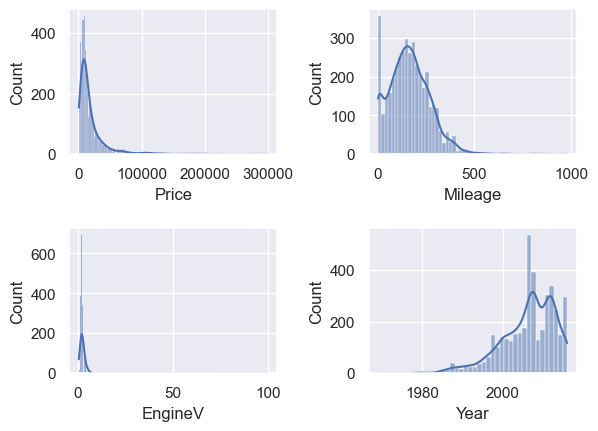

In [7]:
# Now let's explore the numerical values

fig, axes = plt.subplots(ncols=2, nrows=2)
fig.tight_layout(pad=2.5)
cols = ['Price', 'Mileage', 'EngineV', 'Year']
for i, ax in zip(range(4), axes.flat):
    sns.histplot(data_no_mv[cols[i]], kde=True, ax=ax)
plt.show()

We can clearly see there are some issues regarding outliers in this data, we can try to remove them using the following logic:
- Price: remove the top x%
- Mileage: remove the top x%
- EngineV: remove the top x%
- Year: remove the bottom x%

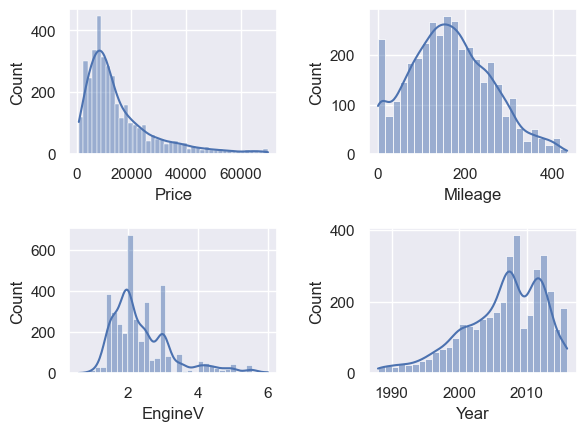

Previous data row amount: 4025
New data row amount: 3732


In [8]:
# Lets remove the data and verify the new results (Note: quantile values were manually adjusted)
q_price = data_no_mv['Price'].quantile(0.96)
q_mileage = data_no_mv['Mileage'].quantile(0.99)
q_engineV = data_no_mv['EngineV'].quantile(0.99)
q_year = data_no_mv['Year'].quantile(0.01)

data_no_outlier = data_no_mv[data_no_mv['Price'] < q_price]
data_no_outlier = data_no_outlier[data_no_outlier['Mileage'] < q_mileage]
data_no_outlier = data_no_outlier[data_no_outlier['EngineV'] < q_engineV]
data_no_outlier = data_no_outlier[data_no_outlier['Year'] > q_year]

fig, axes = plt.subplots(ncols=2, nrows=2)
fig.tight_layout(pad=2.5)
cols = ['Price', 'Mileage', 'EngineV', 'Year']
for i, ax in zip(range(4), axes.flat):
    sns.histplot(data_no_outlier[cols[i]], kde=True, ax=ax)
plt.show()

print(f'Previous data row amount: {data_no_mv.shape[0]}')
print(f'New data row amount: {data_no_outlier.shape[0]}')

By removing the top 5% of vehicles by price, 1% by mileage, 1% by Engine Volume and bottom 1% year we have decreased the outliers significantly while losing 293 rows of data.

In [9]:
data_no_outlier.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3732,3732.000000,3732,3732.000000,3732.000000,3732,3732,3732.000000,3732
unique,7,NaN,6,NaN,NaN,4,2,NaN,280
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,844,NaN,1428,NaN,NaN,1720,3370,NaN,181
mean,NaN,15669.350244,NaN,165.458735,2.402859,NaN,NaN,2006.438639,NaN
std,NaN,13187.287478,NaN,93.255942,0.901336,NaN,NaN,6.014967,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,98.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11300.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19999.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


## Handle OLS assumptions
### Linearity

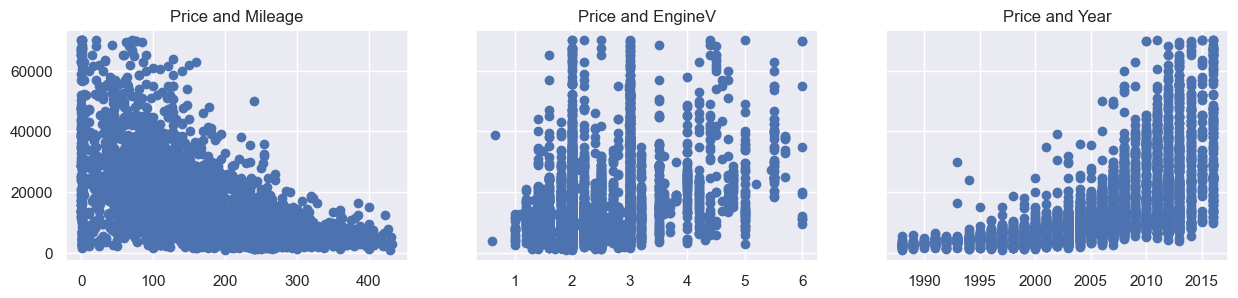

In [10]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
cols = ['Mileage', 'EngineV', 'Year']
for i, ax in zip(range(3), axes.flat):
    ax.scatter(data_no_outlier[cols[i]], data_no_outlier['Price'])
    ax.set_title(f'Price and {cols[i]}')
plt.show()

We can spot some issues with this data, Mileage and Year are not following a linear relation, Engine Volume is still a bit confusing. This is probably due to the price having a linear distribution, lets try to fix it with a logarithmic operation.

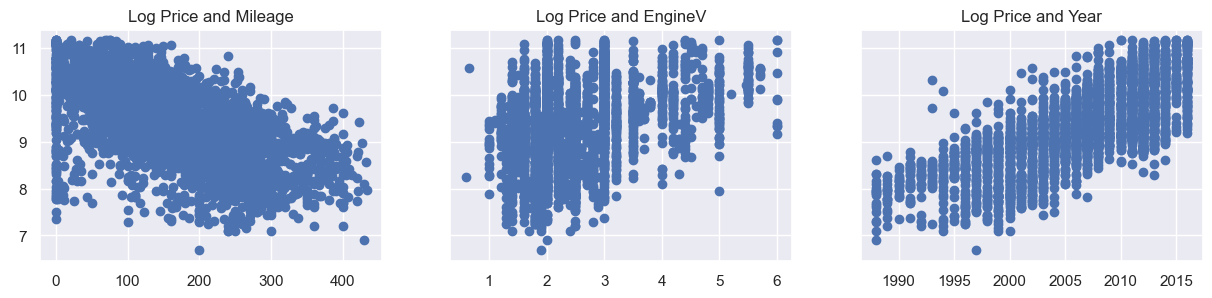

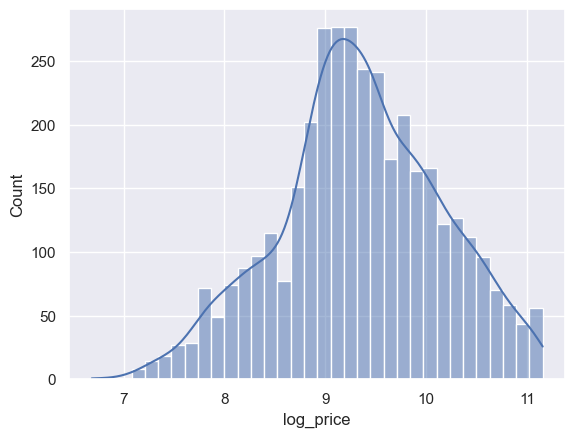

In [11]:
data_no_outlier['log_price'] = np.log(data_no_outlier['Price'])

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
cols = ['Mileage', 'EngineV', 'Year']
for i, ax in zip(range(3), axes.flat):
    ax.scatter(data_no_outlier[cols[i]], data_no_outlier['log_price'])
    ax.set_title(f'Log Price and {cols[i]}')
plt.show()
sns.histplot(data_no_outlier['log_price'], kde=True)
plt.show()

After applying the logarithmic operation the results are much more linear. They also respect normality and homoscedasticity.

In [12]:
# No longer need 'price'
data_no_outlier = data_no_outlier.drop(['Price'], axis=1)

### No autocorrelation
The data isn't coming from times series or panel data.

### No multicollinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vars = data_no_outlier[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif['features'] = vars.columns
vif

,VIF,features
0,10.523133,Year
1,4.144920,Mileage
2,8.150959,EngineV


Year has a lot of multicollinearity with other variables so it should be removed. It makes sense since usually the more years a car has the more miles it has, also new cars are getting more efficient and economic maybe engines are getting smaller because of that. Let's test it.

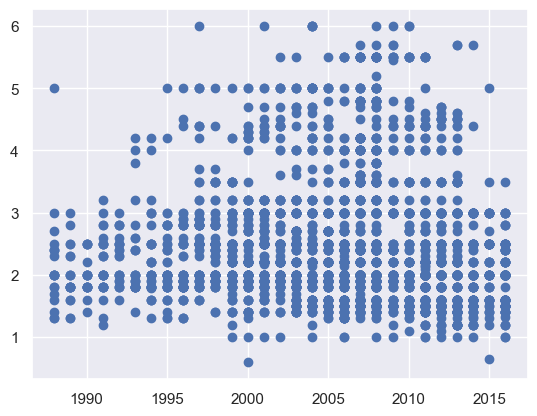

In [14]:
plt.scatter(data_no_outlier['Year'], data_no_outlier['EngineV'])
plt.show()

It doesn't seem like that is the case, anyways year should be removed.

In [15]:
data_ols = data_no_outlier.drop(['Year'], axis=1)

In [16]:
data_ols.describe()

,Mileage,EngineV,log_price
count,3732.000000,3732.000000,3732.000000
mean,165.458735,2.402859,9.346538
std,93.255942,0.901336,0.808410
min,0.000000,0.600000,6.684612
25%,98.000000,1.800000,8.853665
50%,160.000000,2.000000,9.332558
75%,230.000000,3.000000,9.903438
max,433.000000,6.000000,11.156236


## Dummy variables

In [17]:
pd.get_dummies(data_ols)

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,9.495519,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,10.043249,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,9.814656,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1.6,8.824678,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4338,163,2.5,9.350102,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4339,35,1.6,9.792556,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4341,1,3.5,8.779557,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now we are going to have to divide the data set to check using either brands or models, we are also going to drop the first to avoid infinite multicollinearity between them.

In [18]:
data_dummy_brand = pd.get_dummies(data_no_outlier.drop(['Model'], axis=1), drop_first=True)
data_dummy_model = pd.get_dummies(data_no_outlier.drop(['Brand'], axis=1), drop_first=True)

In [19]:
data_dummy_brand.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [20]:
data_dummy_model.head()

,Mileage,EngineV,Year,log_price,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,1991,8.342840,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,1999,8.974618,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,2003,9.495519,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,2007,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,2011,9.814656,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we can see one table has significantly more columns than the other, this will probably be an issue but I'm curious to see the results.

## Pre-Processing

We are going to use every column from the data so we don't have to do much.

In [21]:
# Define the target and input

target_w_brand = data_dummy_brand['log_price']
input_w_brand = data_dummy_brand.drop(['log_price'], axis=1)

target_w_model = data_dummy_model['log_price']
input_w_model = data_dummy_model.drop(['log_price'], axis=1)

In [22]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler_brand = StandardScaler()
scaler_brand.fit(input_w_brand)
input_brand_scaled = scaler_brand.transform(input_w_brand)

scaler_model = StandardScaler()
scaler_model.fit(input_w_model)
input_model_scaled = scaler_model.transform(input_w_model)

In [23]:
from sklearn.model_selection import train_test_split

input_brand_train, input_brand_test, target_brand_train, target_brand_test = train_test_split(input_brand_scaled, target_w_brand, test_size=0.2, random_state=123)

input_model_train, input_model_test, target_model_train, target_model_test = train_test_split(input_model_scaled, target_w_model, test_size=0.2, random_state=123)

## Regression

In [24]:
reg_brand = LinearRegression()
reg_brand.fit(input_brand_train, target_brand_train)

reg_model = LinearRegression()
reg_model.fit(input_model_train, target_model_train)

LinearRegression()

In [25]:
y_hat_brand = reg_brand.predict(input_brand_train)

y_hat_model = reg_model.predict(input_model_train)

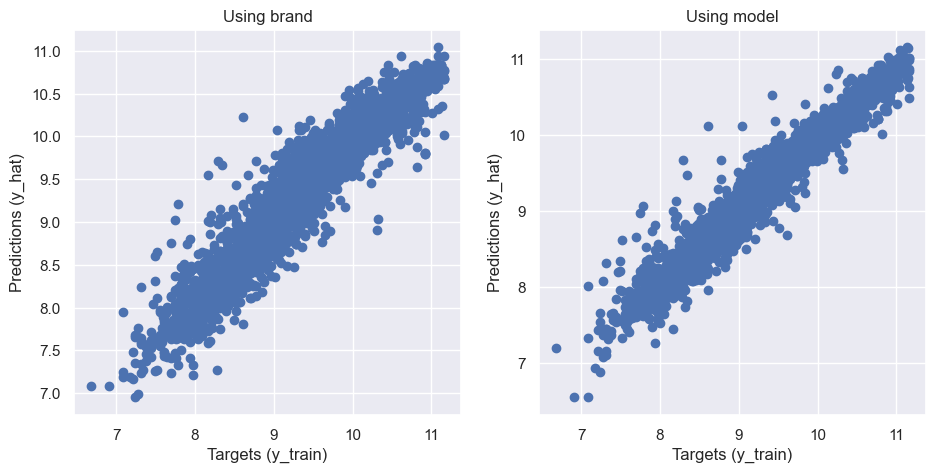

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.scatter(target_brand_train, y_hat_brand)
ax1.set_xlabel('Targets (y_train)')
ax1.set_ylabel('Predictions (y_hat)')
ax1.set_title('Using brand')

ax2.scatter(target_model_train, y_hat_model)
ax2.set_xlabel('Targets (y_train)')
ax2.set_ylabel('Predictions (y_hat)')
ax2.set_title('Using model')

plt.show()

Both results seem promising right now, it is definitely a surprise using that using 'model', maybe it suffers from overfitting is just too specific and won't perform when dealing with untrained data.

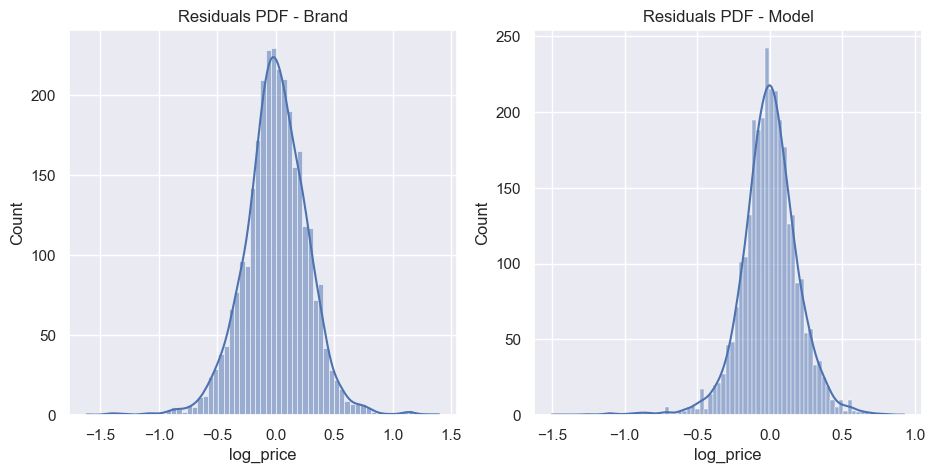

In [27]:
# Check the residuals
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
sns.histplot(target_brand_train - y_hat_brand, kde=True, ax=ax1)
ax1.set_title('Residuals PDF - Brand')
sns.histplot(target_model_train - y_hat_model, kde=True, ax=ax2)
ax2.set_title('Residuals PDF - Model')
plt.show()

The residuals also seem to be similar.

In [28]:
print(f'Brand R score is {reg_brand.score(input_brand_train, target_brand_train)}')
print(f'Model R score is {reg_model.score(input_model_train, target_model_train)}')

Brand R score is 0.882997281828561
Model R score is 0.9361136086777195


When using models the R score seems to be superior, although I still believe that by using 'model' we are overfitting the model when compared to 'brand'.

## Test the data

In [29]:
y_hat_test_brand = reg_brand.predict(input_brand_test)
y_hat_test_model = reg_model.predict(input_model_test)

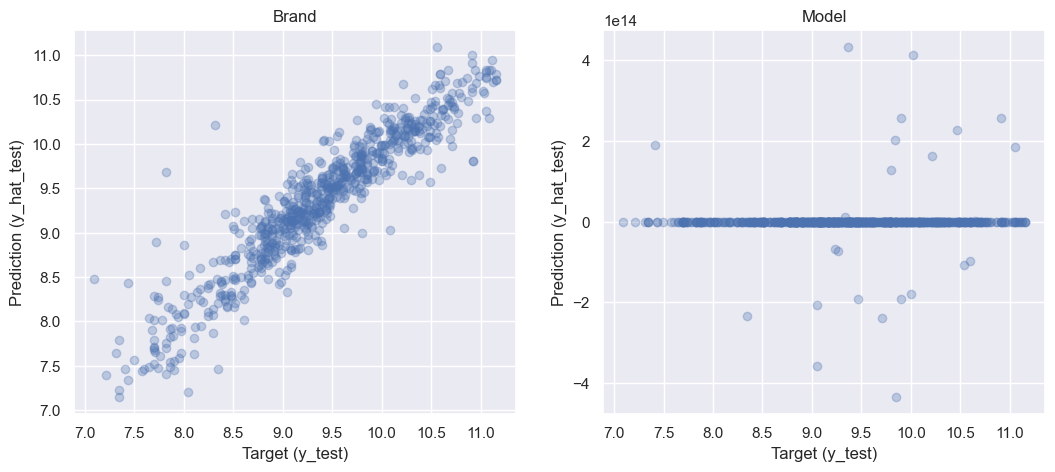

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
f.tight_layout(pad=2.5)

ax1.scatter(target_brand_test, y_hat_test_brand, alpha=0.3)
ax1.set_xlabel('Target (y_test)')
ax1.set_ylabel('Prediction (y_hat_test)')
ax1.set_title('Brand')

ax2.scatter(target_model_test, y_hat_test_model, alpha=0.3)
ax2.set_xlabel('Target (y_test)')
ax2.set_ylabel('Prediction (y_hat_test)')
ax2.set_title('Model')

plt.show()

As expected my suspicions where true, by using 'model' we have completely overfitted our model and we cannot provide quality results, this could be a good idea if our dataset had a much larger amount of data for each car 'model', but as it stands we don't so using 'brand' is our best option.